In [1]:
#In this dataset, we are going to perform data Exploration and data visualization of the given dataset. Other things which can explore through it are as follow: -
# Explatory Data Analysis
# Determining characteristics affecting placement
# Determining characteristics affecting salary
# Common questions which can be answered through this dataset are: -
# Does GPA affect placement?
# Does Higher Secondary School's Percentage still affect campus placement?
# Is work experience required for securing good job?
# What factor affect the salary?

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [3]:
df=pd.read_csv('18-Placement_Data_Full_Class.csv')

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.shape # Checking the number of rows and columns

(215, 15)

In [6]:
#Remove Serial Number because it is not useful for analysis purpose
df.drop("sl_no", axis=1, inplace=True)

In [7]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [8]:
# Checkinf for duplicate values
df.duplicated().sum()     # We don't have any duplicated values

0

In [9]:
df.dtypes     # Shows the data type of each variable

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [10]:
df.describe().round()  # Gives the statistical Summary of the numeric variables in a dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.0,215.0,215.0,215.0,215.0,148.0
mean,67.0,66.0,66.0,72.0,62.0,288655.0
std,11.0,11.0,7.0,13.0,6.0,93457.0
min,41.0,37.0,50.0,50.0,51.0,200000.0
25%,61.0,61.0,61.0,60.0,58.0,240000.0
50%,67.0,65.0,66.0,71.0,62.0,265000.0
75%,76.0,73.0,72.0,84.0,66.0,300000.0
max,89.0,98.0,91.0,98.0,78.0,940000.0


In [11]:
#finding columns names in the dataset
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [12]:
# Looking for the unique values of Categorical Features in the dataset
print(df['ssc_b'].unique())
print(df['hsc_b'].unique())
print(df['hsc_s'].unique())
print(df['degree_t'].unique())
print(df['workex'].unique())
print(df['specialisation'].unique())
print(df['status'].unique())

['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [13]:
#Checking Null values
df.isnull().sum()      

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [14]:
# Salary variable has 67 null values
# So, we had made a separate dataframe for not null values in all columns for the purpose of data exploration.
null_salary_data = df[df['salary'].notna()]
null_salary_data = null_salary_data.reset_index(drop = True)

In [15]:
#Finding out total number of Males and females in the dataset
df['gender'].value_counts()  #There are 139 Males and 76 Females 

M    139
F     76
Name: gender, dtype: int64

In [16]:
# Finding out total number of students who were from Central Board  and from other Board in 10th standard in this dataset. 
df['ssc_b'].value_counts() # Hence, 116 Students were from Central Board and 99 students were from other boards in 10th Class 

Central    116
Others      99
Name: ssc_b, dtype: int64

In [17]:
# Finding out total number of students who were from Central Board  and from other Board in 12th standard in this dataset.
df['hsc_b'].value_counts() # Hence, Only 84 Students were from Central Board and 131 are from others Boards in 12th Class

Others     131
Central     84
Name: hsc_b, dtype: int64

In [18]:
# Finding out total number of students who have opted for science, commerece and arts in 12th standard in this dataset.
df['hsc_s'].value_counts() # Hence, 113 students taken Commerce as compared to 91 science and 11 Arts

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [19]:
# Finding out total number of students who have work experience and who did'nt have work experience in this dataset.
df['workex'].value_counts() # Therfore, Maximum of 141 students didn't have Experience as compared to 74 Experienced

No     141
Yes     74
Name: workex, dtype: int64

In [20]:
# Finding out total number of students who have specialization in Marketing-finance or Marketing-HR in this dataset.
df['specialisation'].value_counts() # There are 120 students have Specialization in Marketing-finance and 95 in Marketing-HR

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [21]:
# Finding out total number of students who have got placed or not in a company in this dataset.
df['status'].value_counts() # 148 students got placed as compared to 67 not placed students

Placed        148
Not Placed     67
Name: status, dtype: int64

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


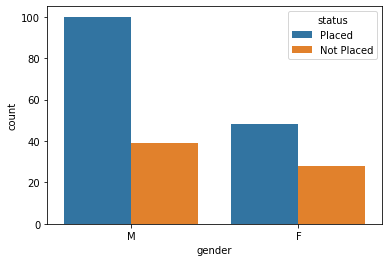

In [22]:
# Does gender affect placements in this particular dataset?
sns.countplot("gender", hue="status", data=df)
plt.show()

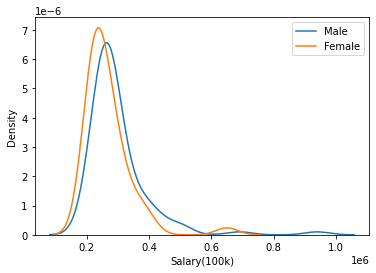

In [23]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(df.salary[ df.gender=="M"])
sns.kdeplot(df.salary[ df.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary(100k)")
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


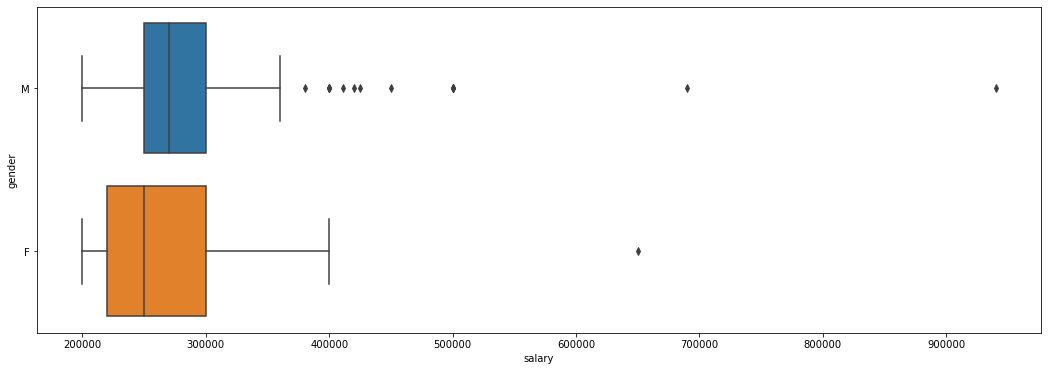

In [24]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=df)
plt.show()

In [25]:
# Analysis of the data to answer the above stated question are as follow: -
# 30 Female and 40 Male students are not placed. Male students have comparatively higher placements.
# More outliers on Male -> Male students are getting high CTC jobs.
# Male students are offered slightly greater salary than female on an average.

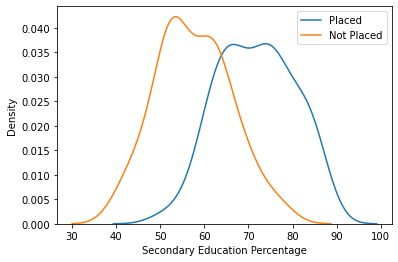

In [26]:
#Does Secondary Education affect placements in this dataset?
sns.kdeplot(df.ssc_p[ df.status=="Placed"])
sns.kdeplot(df.ssc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


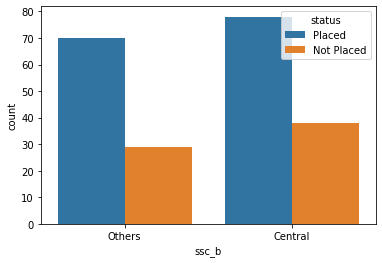

In [27]:
sns.countplot("ssc_b", hue="status", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


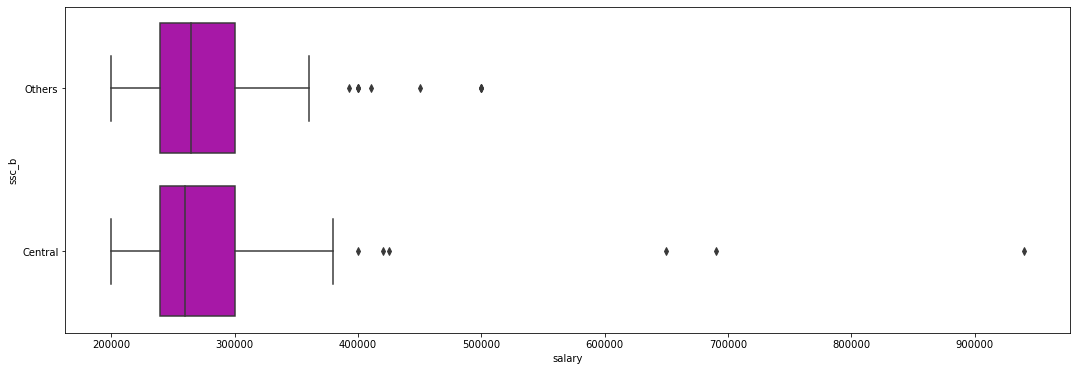

In [28]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=df, color='m')
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


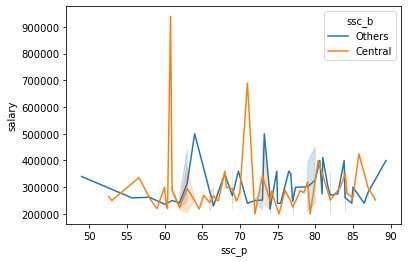

In [29]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=df)
plt.show()

In [30]:
# Analysis of the data to answer the above stated question are as follow: -
# All students with Secondary Education Percentage above 90% are placed
# All students with Secondary Education Percentage below 50% are not-placed
# Students with good Secondary Education Percentage are placed on average.
# Board Of Education does not affect Placement Status much.
# No specific pattern (correlation) between Secondary Education Percentage and Salary.
# Board of Education is Not Affecting Salary

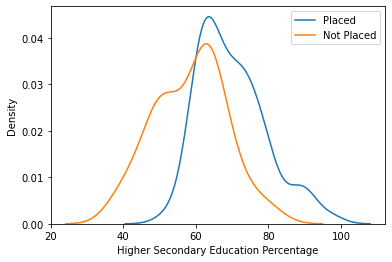

In [31]:
#Does higher secondary school affect Placements in this dataset?
sns.kdeplot(df.hsc_p[ df.status=="Placed"])
sns.kdeplot(df.hsc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


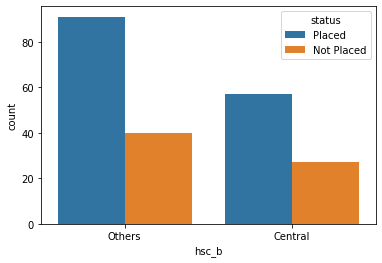

In [32]:
sns.countplot("hsc_b", hue="status", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


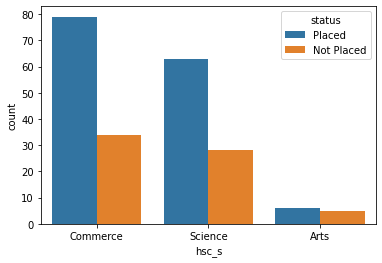

In [33]:
sns.countplot("hsc_s", hue="status", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


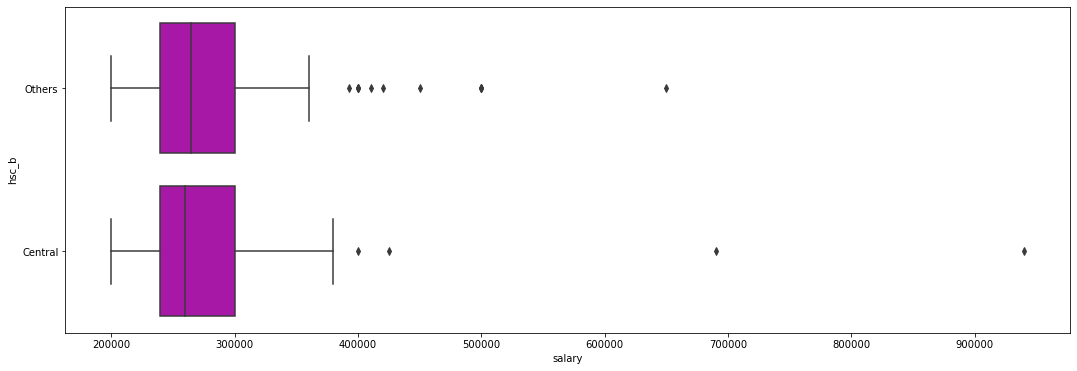

In [34]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=df, color='m')
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


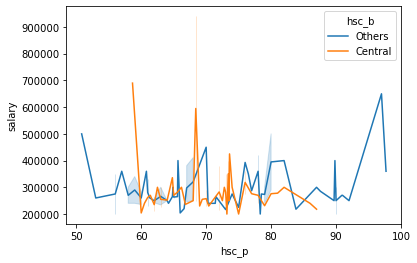

In [35]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


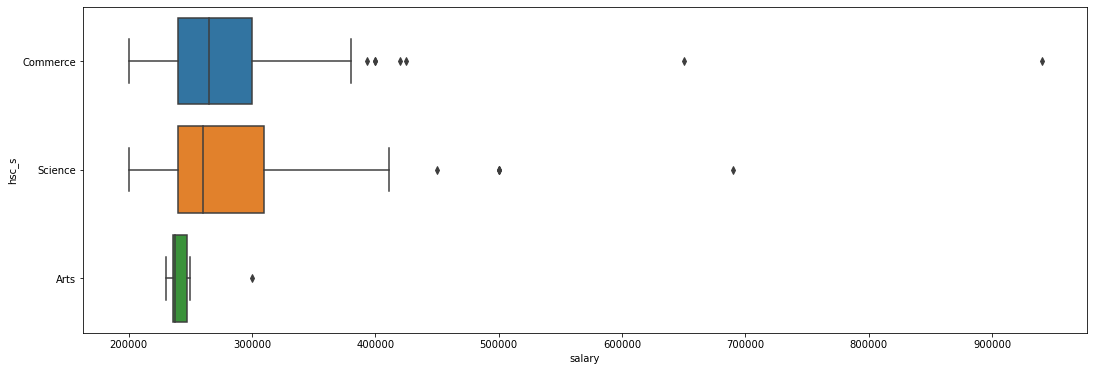

In [36]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


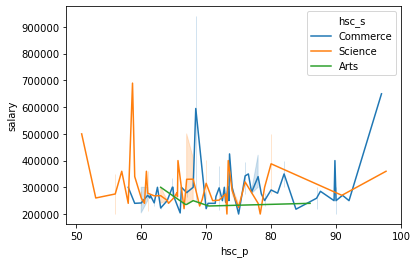

In [37]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=df)
plt.show()

In [38]:
# Analysis of the data to answer the above stated question are as follow: -
# Overlap here too. More placements for percentage above 65%
# Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed
# Education Board again, doesn't affect placement status much
# We have very less students with Arts specialization.
# Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.
# High salary from both Central and Other. Also, High salary for both high and low percentage.Thus, both these feature doesnot affect salary.
# We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.
# Commerce students have slightly better placement status.

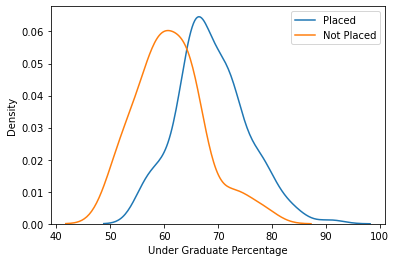

In [39]:
# Does Under Graduate affect placements in this dataset?
sns.kdeplot(df.degree_p[df.status=="Placed"])
sns.kdeplot(df.degree_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


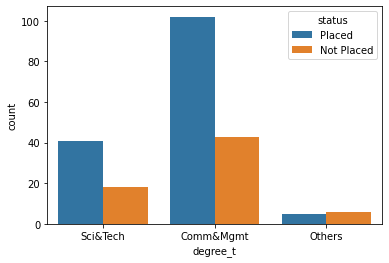

In [40]:
sns.countplot("degree_t", hue="status", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


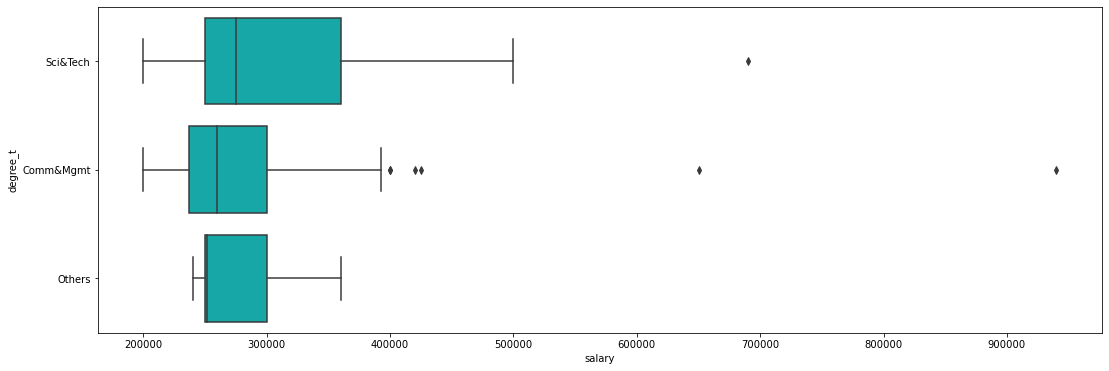

In [41]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=df, color='c')
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


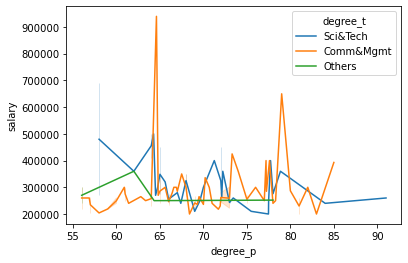

In [42]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=df)
plt.show()

In [43]:
# Analysis of the data to answer the above stated question are as follow: -
# Overlap here too. But we can say that more placementsto those students who got percentage above 65.
# UG Percentage least 50% to get placement
# We have very less students with "Other". We cant make decision from few cases.
# Around 2:1 placed:unplaced ratio for both Science and Commerse students
# Science&Tech students getting more salary on average
# Management students are getting more highly paid jobs.
# Percentage does not seem to affect salary.
# Commerce&Mgmt students occasionally get placements with high salary

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


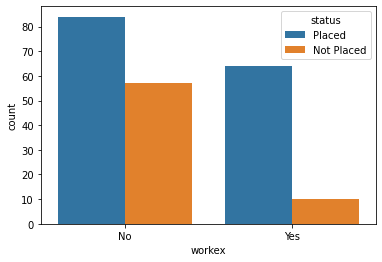

In [44]:
# Does Work Experience affect placements in this dataset?
sns.countplot("workex", hue="status", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


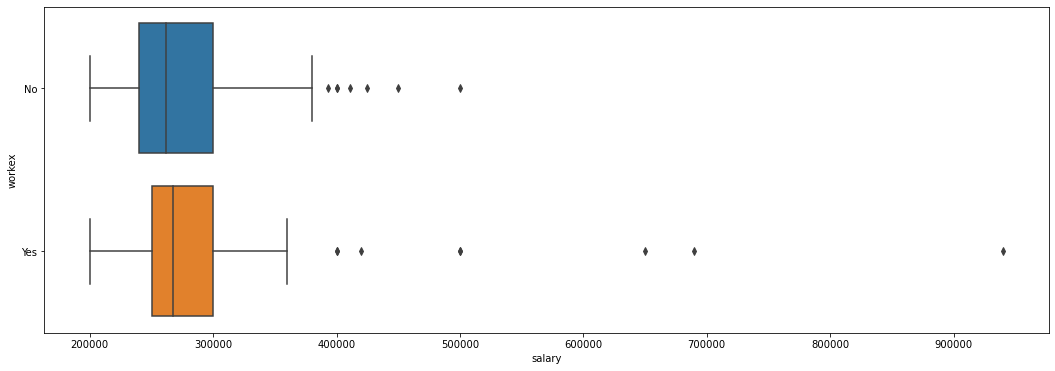

In [45]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=df)
plt.show()

In [46]:
# Analysis of the data to answer the above stated question are as follow: -
# This affects Placement. Very few students with work experience are not getting placed!
# Outliers (High salary than average) on bith end but students with experience getting dream jobs
# Average salary as well as base salary high for students with work experience.

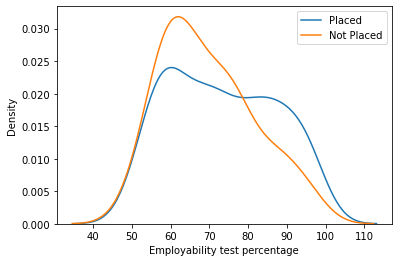

In [47]:
# How much employment test affect placements in this dataset?
sns.kdeplot(df.etest_p[df.status=="Placed"])
sns.kdeplot(df.etest_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


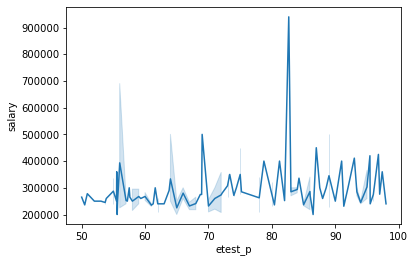

In [48]:
sns.lineplot("etest_p", "salary", data=df)
plt.show()

In [49]:
# Analysis of the data to answer the above stated question are as follow: -
# High overlap.So, it does not affect placement status much
# More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range
# This feature surprisingly does not affect placements and salary much

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


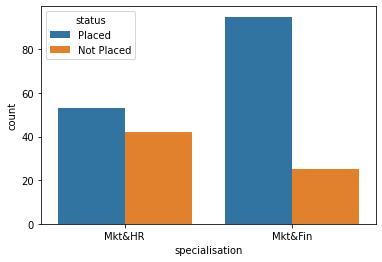

In [50]:
sns.countplot("specialisation", hue="status", data=df)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


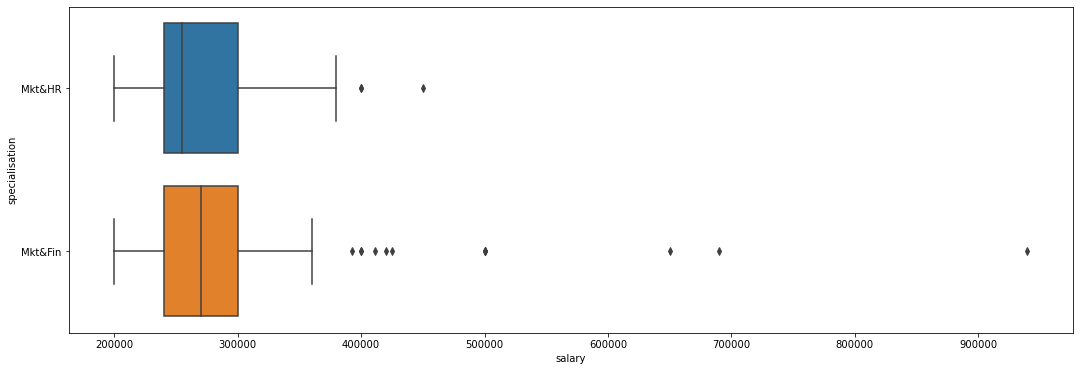

In [51]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=df)
plt.show()

In [52]:
# Analysis of the data to answer the above stated question are as follow: -
# This feature affects Placement status.
# Comparitively very low not-placed students in Mkt&Fin Section
# More highly paid jobs for Mkt&Fin students

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


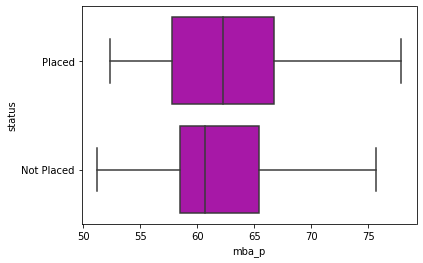

In [53]:
# Does MBA Percentage affect placements in this dataset?
sns.boxplot("mba_p", "status", data=df, color='m')
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


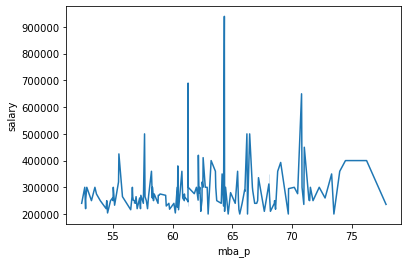

In [54]:
sns.lineplot("mba_p", "salary", data=df)
plt.show()

In [55]:
# Analysis of data to answer the above question is that a Percentage in MBA also does not affect salary much

In [56]:
# Correlation Matrix Data Frame
correlation=df.corr()
correlation

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


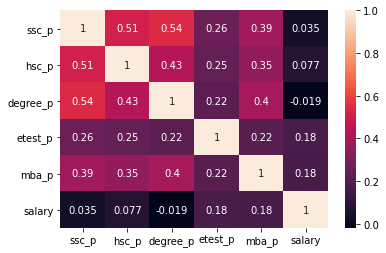

In [57]:
sns.heatmap(correlation, annot=True)
plt.show()

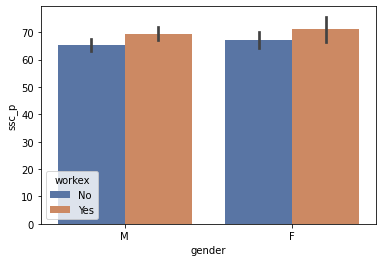

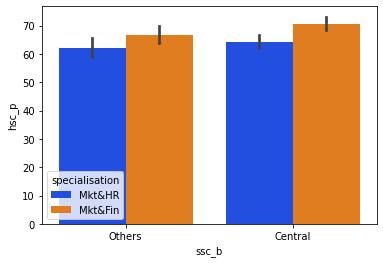

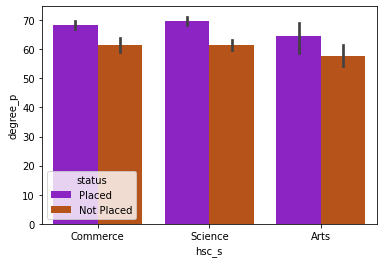

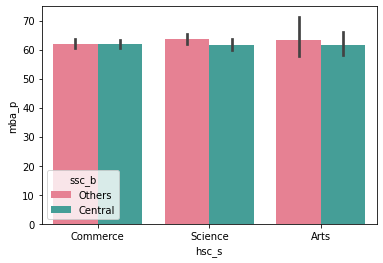

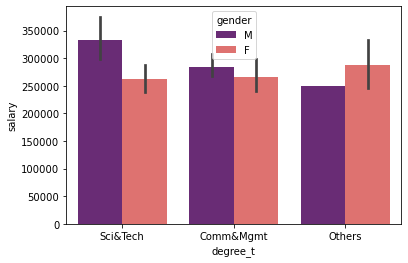

In [58]:
# Multivariate Analysis Visualzation
sns.barplot(x='gender',y='ssc_p',data=df,hue='workex',palette='deep')
plt.show()
sns.barplot(x='ssc_b',y='hsc_p',data=df,hue='specialisation',palette='bright')
plt.show()
sns.barplot(x='hsc_s',y='degree_p',data=df,hue='status',palette='gnuplot')
plt.show()
sns.barplot(x='hsc_s',y='mba_p',data=df,hue='ssc_b',palette='husl')
plt.show()
sns.barplot(x='degree_t',y='salary',data=df,hue='gender',palette='magma')
plt.show()

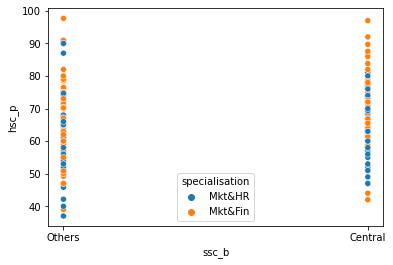

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='ssc_b',y='hsc_p',data=df,hue='specialisation')
plt.show()

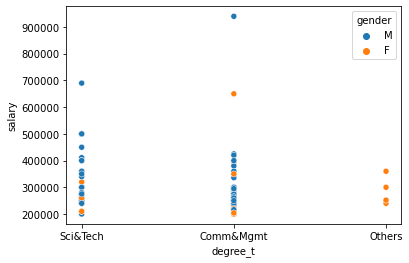

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='degree_t',y='salary',data=df,hue='gender')
plt.show()

In [61]:
#Above Graph shows how salary varies with degree and which degree student has highest salary

In [62]:
# Exploring select and high functionality on a scatter plot
selected_area = alt.selection_interval()
alt.Chart(df).mark_circle().encode(
x='ssc_p',
y='hsc_p',
color='degree_t:N'
).add_selection(
selected_area
)

alt.Chart(...)

In [63]:
selected_area = alt.selection_interval()
alt.Chart(df).mark_circle().encode(
x='ssc_p',
y='hsc_p',
color=alt.condition(selected_area, 'degree_t:O', alt.
value('lightgray')),
tooltip= ['gender', 'ssc_p', 'hsc_p', 'mba_p', 'salary']
).interactive().add_selection(
selected_area
)

alt.Chart(...)

In [64]:
# interactive heatmap
alt.Chart(df).mark_rect().encode(
alt.X('ssc_p', bin=True),
alt.Y('hsc_p', bin=True),
alt.Color('count()',
scale=alt.Scale(scheme='greenblue'),
legend=alt.Legend(title='Total Students'),
)
).interactive()

alt.Chart(...)